In [4]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

import pickle

In [5]:
file = open('model_data.pkl', 'rb')
data = pickle.load(file)
file.close()

## without log transform

In [6]:
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

In [7]:
max(y_train), min(y_train)

(335000000.0, 1100000.0)

In [8]:
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [9]:
y_pred = reg_rf.predict(x_test)

In [10]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))

MAE: 33024162.65946573
MSE: 2917697896749530.0
RMSE: 54015718.97836342
r2_score: 0.0740128040575102


In [11]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [12]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [13]:
rf_random = RandomizedSearchCV(
    estimator = reg_rf, 
    param_distributions = random_grid,
    scoring='neg_mean_squared_error', 
    n_iter = 10, 
    cv = 5, 
    verbose=3, 
    random_state=42, 
    n_jobs = 1)

In [14]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-2641035946042784.000 total time=   4.1s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-2708069954349192.000 total time=   4.1s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-2496523436631450.000 total time=   4.0s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-2559986754561705.000 total time=   4.0s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-2783816614485983.000 total time=   4.1s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=-2630706693662768.000 total time=   6.2s
[CV 2/5] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [15]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

In [16]:
prediction = rf_random.predict(x_test)

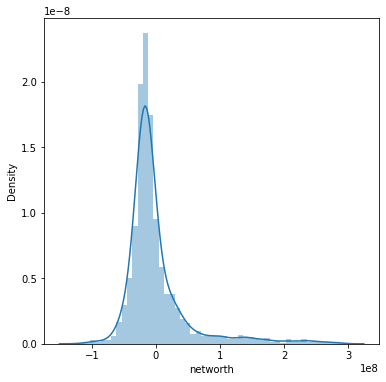

In [17]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 31451058.04856741
MSE: 2598871014608721.5
RMSE: 50979123.321304


In [19]:
file = open('RandomForestRegressor.pkl', 'wb')
pickle.dump(rf_random, file)

## with log transform

In [20]:
x_train_log = data['x_train_log']
x_test_log = data['x_test_log']
y_train_log = data['y_train_log']
y_test_log = data['y_test_log']

In [21]:
max(y_train_log), min(y_train_log)

(19.62964108978934, 13.9108207377686)

In [22]:
reg_rf_log = RandomForestRegressor()
reg_rf_log.fit(x_train_log, y_train_log)

RandomForestRegressor()

In [23]:
y_pred_log = reg_rf_log.predict(x_test)

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test_log, y_pred_log))
print('MSE:', metrics.mean_squared_error(y_test_log, y_pred_log))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_log, y_pred_log)))

MAE: 0.9943731036134436
MSE: 1.5729993293988078
RMSE: 1.2541927002653173


In [25]:
rf_random_log = RandomizedSearchCV(
    estimator = reg_rf, 
    param_distributions = random_grid,
    scoring='neg_mean_squared_error', 
    n_iter = 10, 
    cv = 5, 
    verbose=3, 
    random_state=42, 
    n_jobs = 1)

In [26]:
rf_random_log.fit(x_train_log, y_train_log)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-1.387 total time=   4.1s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-1.398 total time=   4.1s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-1.371 total time=   4.1s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-1.410 total time=   4.9s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-1.389 total time=   4.1s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=-1.390 total time=   6.2s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, s

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [27]:
rf_random_log.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [28]:
prediction = rf_random_log.predict(x_test_log)

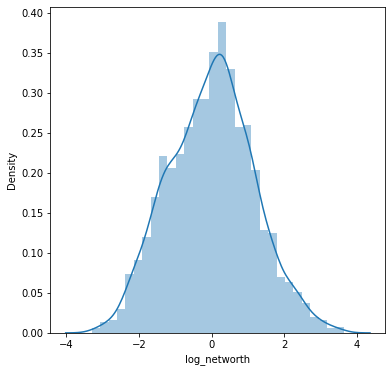

In [29]:
plt.figure(figsize = (6,6))
sns.distplot(y_test_log-prediction)
plt.show()

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test_log, prediction))
print('MSE:', metrics.mean_squared_error(y_test_log, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_log, prediction)))

MAE: 0.94183014989919
MSE: 1.3774487133599764
RMSE: 1.1736476103839586


In [31]:
file = open('RandomForestRegressorLog.pkl', 'wb')
pickle.dump(rf_random_log, file)